In [2]:
import pandas as pd

In [ ]:
birds_df = pd.read_csv("data/train_metadata.csv")
birds_df

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...
24454,zitcis1,[],[''],43.5925,4.5434,Cisticola juncidis,Zitting Cisticola,Chèvremont Fabian,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://xeno-canto.org/845747,zitcis1/XC845747.ogg
24455,zitcis1,[],[''],43.5925,4.5434,Cisticola juncidis,Zitting Cisticola,Chèvremont Fabian,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/845817,zitcis1/XC845817.ogg
24456,zitcis1,[],[''],51.1207,4.5607,Cisticola juncidis,Zitting Cisticola,Wim Jacobs,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/856176,zitcis1/XC856176.ogg
24457,zitcis1,[],[''],41.5607,-8.4236,Cisticola juncidis,Zitting Cisticola,Jorge Leitão,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://xeno-canto.org/856723,zitcis1/XC856723.ogg


### Sound distribution grouped by primary label

count    182.00000
mean     134.39011
std      156.82688
min        5.00000
25%       25.25000
50%       60.50000
75%      166.00000
max      500.00000
Name: primary_label, dtype: float64


<Axes: >

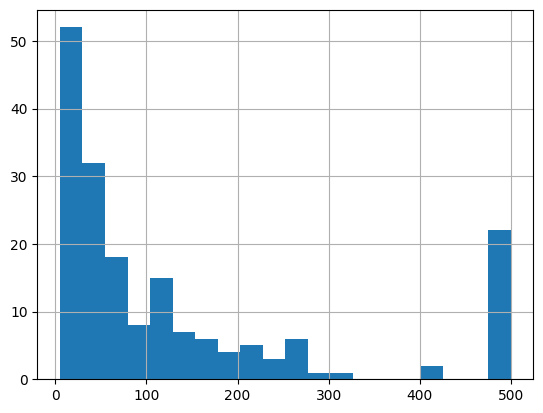

In [16]:
grouped_by_primary_label = birds_df["primary_label"].groupby(birds_df["primary_label"]).count()
print(grouped_by_primary_label.describe())
grouped_by_primary_label.hist(bins=20)

## Average audio ratings for each primary label

count    182.000000
mean       3.914549
std        0.316984
min        2.250000
25%        3.757735
50%        3.931783
75%        4.087407
max        4.700000
Name: rating, dtype: float64


<Axes: >

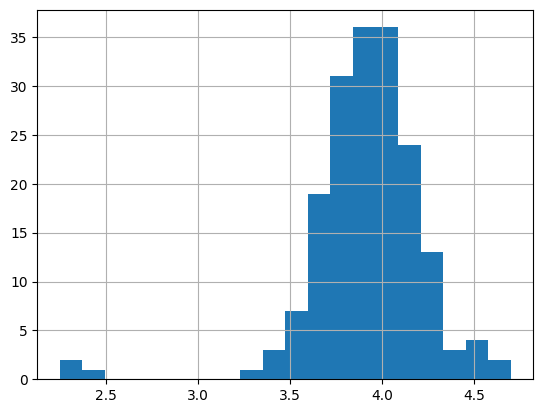

In [18]:
grouped_by_primary_label = birds_df["rating"].groupby(birds_df["primary_label"]).mean()
print(grouped_by_primary_label.describe())
grouped_by_primary_label.hist(bins=20)

### Distribution of full audio length for each primary label 

In [ ]:
import os
from pydub import AudioSegment
import pandas as pd
from tqdm.notebook import tqdm

# Define the directory path
root_dir = 'data/train_audio'

# Initialize an empty dictionary to store the results
class_lengths = {}

# Iterate through each class folder
for class_name in tqdm(os.listdir(root_dir), desc='Processing classes'):
    class_dir = os.path.join(root_dir, class_name)
    
    # Check if it's a directory
    if os.path.isdir(class_dir):
        total_length = 0
        
        # Iterate through each audio file in the class folder
        for file_name in tqdm(os.listdir(class_dir), desc=f'Processing {class_name}'):
            if file_name.endswith('.ogg'):
                file_path = os.path.join(class_dir, file_name)
                audio = AudioSegment.from_ogg(file_path)
                total_length += len(audio) / 1000  # Convert milliseconds to seconds
        
        # Store the total length for the class
        class_lengths[class_name] = total_length

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(class_lengths.items()), columns=['Class', 'Total Length (s)'])

print(df)

Processing bkwsti:   2%|▏         | 12/500 [00:08<05:25,  1.50it/s]
Processing classes: 0it [00:08, ?it/s]


KeyboardInterrupt: 

In [ ]:
import os
from pydub import AudioSegment
import pandas as pd
from tqdm import tqdm

# Define the directory path
root_dir = 'data/train_audio'

# Initialize an empty dictionary to store the results
class_lengths = {}

# Iterate through each class folder
dir_list = os.listdir(root_dir)
for i, class_name in enumerate(dir_list):
    print(f"Now processing class '{class_name}' ({i}/{len(dir_list)})")

    class_dir = os.path.join(root_dir, class_name)
    
    # Check if it's a directory
    if os.path.isdir(class_dir):
        total_length = 0
        
        # Iterate through each audio file in the class folder
        inner_pbar = tqdm(os.listdir(class_dir), desc=f'Processing {class_name}')
        for file_name in inner_pbar:
            if file_name.endswith('.ogg'):
                file_path = os.path.join(class_dir, file_name)
                audio = AudioSegment.from_ogg(file_path)
                total_length += len(audio) / 1000  # Convert milliseconds to seconds
        
        # Store the total length for the class
        class_lengths[class_name] = total_length
    
    # pbar.write(f'Processed {class_name}')

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(class_lengths.items()), columns=['Class', 'Total Length (s)'])
df.to_csv('class_lengths.csv', index=False)

print(df)

Now processing class 'bkwsti' (0/182)


Processing bkwsti:   0%|          | 0/500 [00:00<?, ?it/s]

Processing bkwsti:   8%|▊         | 41/500 [00:40<07:27,  1.02it/s]


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
from pydub import AudioSegment
import pandas as pd
from tqdm import tqdm

# Define the directory path
root_dir = 'data/train_audio'

# Load the existing metadata CSV
metadata_csv = pd.read_csv('data/train_metadata.csv')

# Initialize empty lists to store the audio lengths and file sizes
audio_lengths = []
audio_file_sizes = []

# Iterate through each row in the metadata CSV
for index, row in tqdm(metadata_csv.iterrows(), total=len(metadata_csv)):
    # Get the filename from the row
    filename = row['filename']

    # Get the class name from the filename
    class_name = filename.split('/')[0]

    # Get the file path
    file_path = os.path.join(root_dir, filename)

    # Check if the file exists
    if os.path.exists(file_path):
        # Get the audio length
        audio = AudioSegment.from_ogg(file_path)
        audio_length = len(audio) / 1000  # Convert milliseconds to seconds

        # Get the file size
        file_size = os.path.getsize(file_path)

        # Append the audio length and file size to the lists
        audio_lengths.append(audio_length)
        audio_file_sizes.append(file_size)
    else:
        # If the file does not exist, append NaN values
        audio_lengths.append(np.nan)
        audio_file_sizes.append(np.nan)

# Create new columns in the metadata CSV
metadata_csv['audio_length'] = audio_lengths
metadata_csv['file_size'] = audio_file_sizes

# Save the updated metadata CSV
metadata_csv.to_csv('data/train_metadata_updated.csv', index=False)

print(metadata_csv.head())

  0%|          | 22/24459 [00:19<6:03:47,  1.12it/s]


KeyboardInterrupt: 